# Deep-learning and convolutional neural networks (CNN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

plt.style.use("seaborn-v0_8-darkgrid")

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
data_path = 'imagedata'
train_dir = os.path.join(data_path, 'train')
validation_dir = os.path.join(data_path, 'validation')
test_dir = os.path.join(data_path, 'test')
img_width, img_height = 32, 32
input_shape = (img_width, img_height, 3)
batch_size = 32
num_epochs = 50

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

train_generator.class_indices

Found 20000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


{'elliptical': 0, 'spiral': 1}

In [5]:
def plot_images(generator, n=1):
    num_images = len(generator.filenames)/ int(n)
    num_cols = int(np.ceil(np.sqrt(num_images)))
    num_rows = int(np.ceil(num_images / num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    for i in range(num_rows):
        for j in range(num_cols):
            if i*num_cols + j >= num_images:
                break
            img_path = os.path.join(generator.directory, generator.filenames[i*num_cols+j])
            img = keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
            axes[i, j].imshow(img)
            axes[i, j].set_title(f"{generator.classes[i*num_cols+j]}")
            axes[i, j].axis("off")
    plt.show()


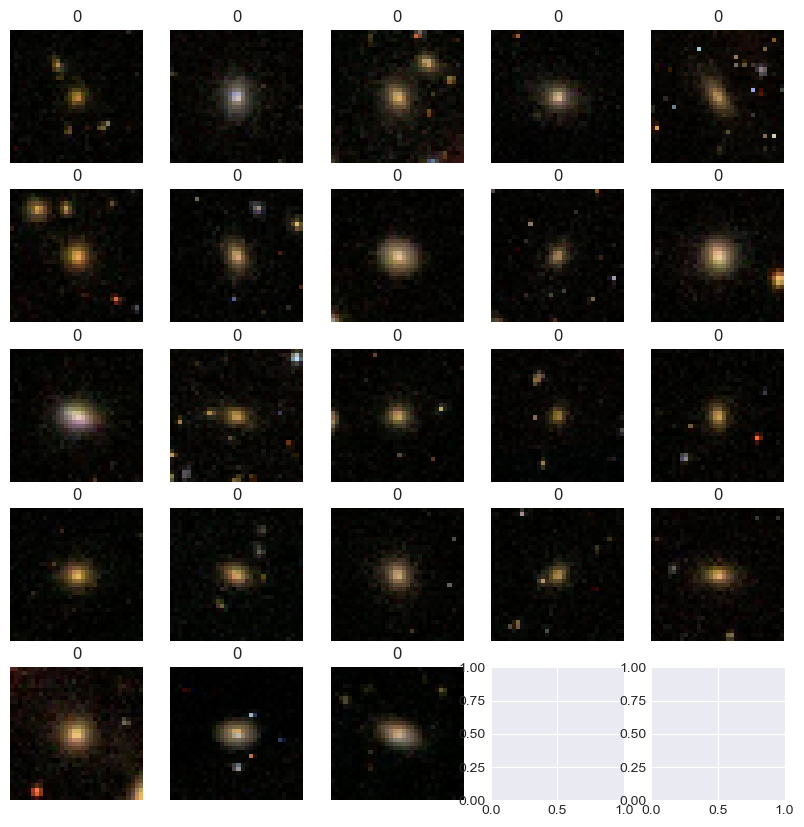

In [6]:
plot_images(train_generator, n=900)

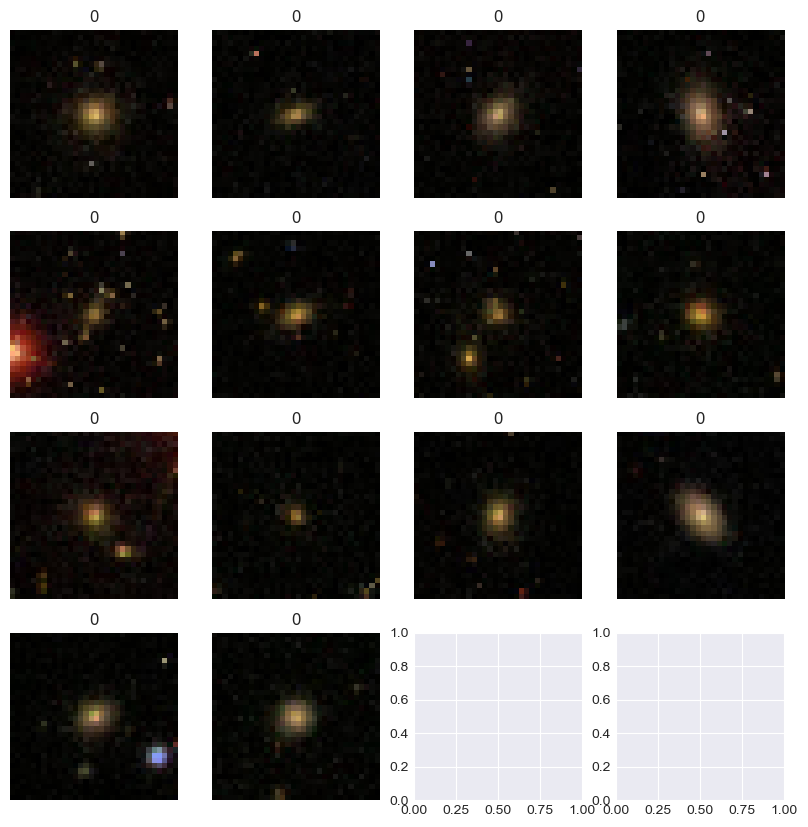

In [7]:
plot_images(validation_generator, 300)

In [8]:
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(2, activation="softmax"),
    ]
)


In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entrainement du modèle
history = model.fit(train_generator,
                    epochs=num_epochs,
                    validation_data=validation_generator)

Epoch 1/50


2023-04-05 21:31:42.537226: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


625/625 [==============================] - 34s 54ms/step - loss: 0.2547 - accuracy: 0.8984 - val_loss: 0.1464 - val_accuracy: 0.9470
Epoch 2/50
625/625 [==============================] - 33s 53ms/step - loss: 0.1529 - accuracy: 0.9419 - val_loss: 0.1734 - val_accuracy: 0.9367
Epoch 3/50
625/625 [==============================] - 33s 53ms/step - loss: 0.1335 - accuracy: 0.9519 - val_loss: 0.1129 - val_accuracy: 0.9578
Epoch 4/50
625/625 [==============================] - 33s 53ms/step - loss: 0.1232 - accuracy: 0.9558 - val_loss: 0.1007 - val_accuracy: 0.9645
Epoch 5/50
625/625 [==============================] - 33s 53ms/step - loss: 0.1139 - accuracy: 0.9598 - val_loss: 0.0963 - val_accuracy: 0.9640
Epoch 6/50
625/625 [==============================] - 34s 54ms/step - loss: 0.1105 - accuracy: 0.9591 - val_loss: 0.0881 - val_accuracy: 0.9665
Epoch 7/50
625/625 [==============================] - 32s 51ms/step - loss: 0.1028 - accuracy: 0.9622 - val_loss: 0.0823 - val_accuracy: 0.9712
Epo

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 10000 images belonging to 2 classes.


In [11]:
model.evaluate(test_generator)

313/313 [==============================] - 14s 44ms/step - loss: 0.0704 - accuracy: 0.9759


[0.07036042958498001, 0.9758999943733215]

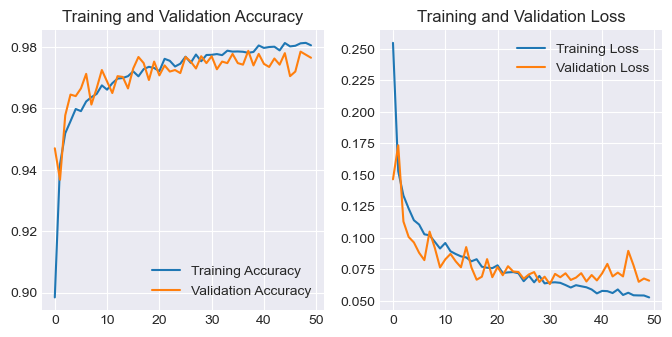

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()